# CNN

> CNN


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp cnn

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Import dependencies
import torch 
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Get data 
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
dataset = DataLoader(train, 32)
#1,28,28 - classes 0-9

# Image Classifier Neural Network
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-6)*(28-6), 10)  
        )

    def forward(self, x): 
        return self.model(x)

# Instance of the neural network, loss, optimizer 
clf = ImageClassifier().to('cuda')
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss() 

In [ ]:
# Training flow 
for epoch in range(10): # train for 10 epochs
    for batch in tqdm(dataset): 
        X,y = batch 
        X, y = X.to('cuda'), y.to('cuda') 
        yhat = clf(X) 
        loss = loss_fn(yhat, y) 

        # Apply backprop 
        opt.zero_grad()
        loss.backward() 
        opt.step() 

    print(f"Epoch:{epoch} loss is {loss.item()}")

with open('data/model_state.pt', 'wb') as f: 
    save(clf.state_dict(), f) 

  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:0 loss is 0.02930162288248539


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:1 loss is 0.015122702345252037


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:2 loss is 0.0010034267324954271


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:3 loss is 0.0003837654658127576


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:4 loss is 4.9363912694389e-05


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:5 loss is 0.00015089042426552624


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:6 loss is 3.805131927947514e-05


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:7 loss is 3.0979390430729836e-05


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:8 loss is 7.227040441648569e-07


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:9 loss is 8.898725354811177e-06
tensor(9, device='cuda:0')


tensor(9, device='cuda:0')


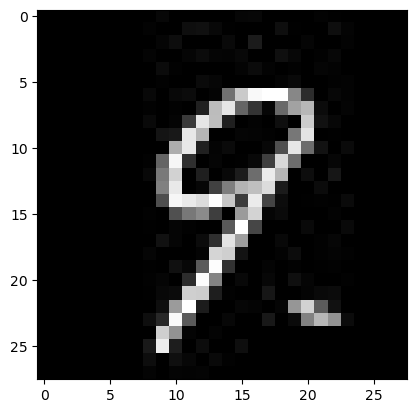

In [ ]:
with open('data/model_state.pt', 'rb') as f: 
    clf.load_state_dict(load(f))  

img = Image.open('data/img_3.jpg') 
plt.imshow(img, cmap = 'gray')
img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

print(torch.argmax(clf(img_tensor)))